In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Charge all the datasets of information



In [3]:
# charge data_01, data_03, data_05
data_01 = pd.read_csv("data_0.1.csv")
data_03 = pd.read_csv("data_0.3.csv")
data_05 = pd.read_csv("data_0.5.csv")
data_01.head()

,id,model,optimizer,loss,task,dataset,Ratio,Replace,Accuracy,F1 Prefix,...,Train Loss 10,Val Loss 10,Train Loss 11,Val Loss 11,Train Loss 12,Val Loss 12,Train Loss 13,Val Loss 13,Train Loss 14,Val Loss 14
0,0,euclidean,Adam,cross,ganea,10,0.5,0.1,0.838714,0.826227,...,0.522592,0.525517,0.496356,0.495202,0.474869,0.470739,0.450699,0.446679,0.430889,0.426836
1,0,euclidean,Adam,cross,ganea,10,0.5,0.1,0.769571,0.731480,...,0.545238,0.554997,0.538124,0.538103,0.526308,0.528326,0.508438,0.517823,0.489215,0.494071
2,0,euclidean,Adam,cross,ganea,10,0.5,0.1,0.757143,0.772057,...,0.532574,0.546891,0.521535,0.527865,0.509520,0.507456,0.491332,0.506448,0.473121,0.484487
3,0,euclidean,Adam,cross,ganea,10,0.5,0.1,0.833143,0.813478,...,0.510775,0.510320,0.489950,0.516159,0.468303,0.474475,0.449761,0.441391,0.432246,0.436503
4,0,euclidean,Adam,cross,ganea,10,0.5,0.1,0.728286,0.714757,...,0.553652,0.560562,0.544048,0.546164,0.531179,0.549315,0.520442,0.526751,0.513129,0.521582


##### **Calculate the mean of every row of the dataset**

In [4]:
# calculate the mean of every id and group by model
data_01_mean = data_01.groupby(["model", "Ratio", "Replace", "dataset"]).mean()
data_03_mean = data_03.groupby(["model", "Ratio", "Replace", "dataset"]).mean()
data_05_mean = data_05.groupby(["model", "Ratio", "Replace", "dataset"]).mean()

# merge the dataframes
data_mean = pd.concat([data_01_mean, data_03_mean, data_05_mean]).drop(["id"], axis=1)
data_mean.reset_index(inplace=True)
data_mean.sort_values(by=["model", "dataset", "Ratio"], inplace=True)
# reset index
data_mean.reset_index(inplace=True)
data_mean.drop(["index"], axis=1, inplace=True)

pass this to a new dataset

In [5]:
data_mean.to_csv("data_mean.csv")

### Graphics of comparing loss on train and val on every experiment

In [6]:
train_loss = [col for col in data_mean.columns if "Train Loss" in col]
val_loss = [col for col in data_mean.columns if "Val Loss" in col]
train_loss_df = data_mean[train_loss]
val_loss_df = data_mean[val_loss]


def get_mean(df, mode):
    new = []
    for i in range(len(df.columns)):
        # obtain the columns
        col = df.columns[i]
        val = df[col]
        new.append(val)
    columns = []
    for i in range(len(data_mean)):
        # obtain the columns
        name = (
            data_mean["model"][i]
            + " "
            + str(data_mean["dataset"][i])
            + " "
            + str(data_mean["Ratio"][i])
            + " "
            + str(data_mean["Replace"][i])
        )
        columns.append(name)
    return new, columns


train_values, train_columns = get_mean(train_loss_df, "Train Loss")
val_values, val_columns = get_mean(val_loss_df, "Val Loss")
print(len(train_values))

train = pd.DataFrame(train_values)
val = pd.DataFrame(val_values)


# rename columns whit the name of the model

train.columns = train_columns
val.columns = val_columns

train.reset_index(inplace=True)
train.drop(["index"], axis=1, inplace=True)

val.reset_index(inplace=True)
val.drop(["index"], axis=1, inplace=True)

15


In [7]:
train.head()

,euclidean 10 0.25 0.1,euclidean 10 0.25 0.3,euclidean 10 0.25 0.5,euclidean 10 0.5 0.1,euclidean 10 0.5 0.3,euclidean 10 0.5 0.5,euclidean 10 0.75 0.1,euclidean 10 0.75 0.3,euclidean 10 0.75 0.5,euclidean 30 0.25 0.1,...,hyperbolic 30 0.75 0.5,hyperbolic 50 0.25 0.1,hyperbolic 50 0.25 0.3,hyperbolic 50 0.25 0.5,hyperbolic 50 0.5 0.1,hyperbolic 50 0.5 0.3,hyperbolic 50 0.5 0.5,hyperbolic 50 0.75 0.1,hyperbolic 50 0.75 0.3,hyperbolic 50 0.75 0.5
0,0.578559,0.578034,0.581301,0.701368,0.699796,0.702712,0.577841,0.573996,0.579531,0.578062,...,0.573916,0.570996,0.571287,0.569790,0.685798,0.686655,0.686251,0.572350,0.573355,0.569580
1,0.559197,0.555632,0.562397,0.675637,0.670597,0.673762,0.558858,0.555868,0.558957,0.545234,...,0.541086,0.524767,0.519783,0.520934,0.613278,0.615717,0.616354,0.532065,0.529313,0.533206
2,0.535815,0.531070,0.546060,0.638192,0.630747,0.632882,0.542376,0.536224,0.542404,0.515261,...,0.509412,0.486515,0.476443,0.481747,0.560858,0.567731,0.565401,0.497226,0.495122,0.500861
3,0.510885,0.509445,0.523521,0.598721,0.595182,0.597964,0.522005,0.514597,0.521333,0.490156,...,0.482364,0.461969,0.449816,0.456562,0.533781,0.540088,0.537618,0.471636,0.471338,0.478190
4,0.495721,0.494076,0.503257,0.573311,0.575086,0.576992,0.501707,0.494888,0.503713,0.471162,...,0.460049,0.446014,0.432418,0.439908,0.514736,0.519810,0.517793,0.454894,0.455277,0.462417


***Function to obtain the loss of each experiment***

In [8]:
def filter(df, type, alls, filtter, dataset="10", replace="0.5", postives="0.5"):

    positives = ["0.25", "0.5", "0.75"]
    replaces = ["0.1", "0.3", "0.5"]
    datasets = ["10", "30", "50"]
    positives.remove(postives)
    replaces.remove(replace)
    datasets.remove(dataset)
    data = df.copy()
    finals = []
    stay = []
    for i in range(len(df.columns)):
        # obtain the columns
        col = df.columns[i]
        if alls:
            stay.append(col)
            finals.append(col.split(" ")[0] + " " + type)
        else:
            if (
                dataset == col.split(" ")[1]
                and replace == col.split(" ")[3]
                and postives == col.split(" ")[2]
            ):
                stay.append(col)
                finals.append(col.split(" ")[0] + " " + type)
            elif filtter in col and filtter != "":
                stay.append(col)
                finals.append(col.split(" ")[0] + " " + type)
    data = data[stay]
    data.columns = finals
    return data


def train_loss(
    train, val, filtter="", alls=False, dataset="10", replace="0.5", postives="0.5"
):
    train = filter(train, "train", alls, filtter, dataset, replace, postives)
    val = filter(val, "val", alls, filtter, dataset, replace, postives)

    return pd.concat([train, val], axis=1)

## **Loss of every experiment**



1) ***All experiments comparation***

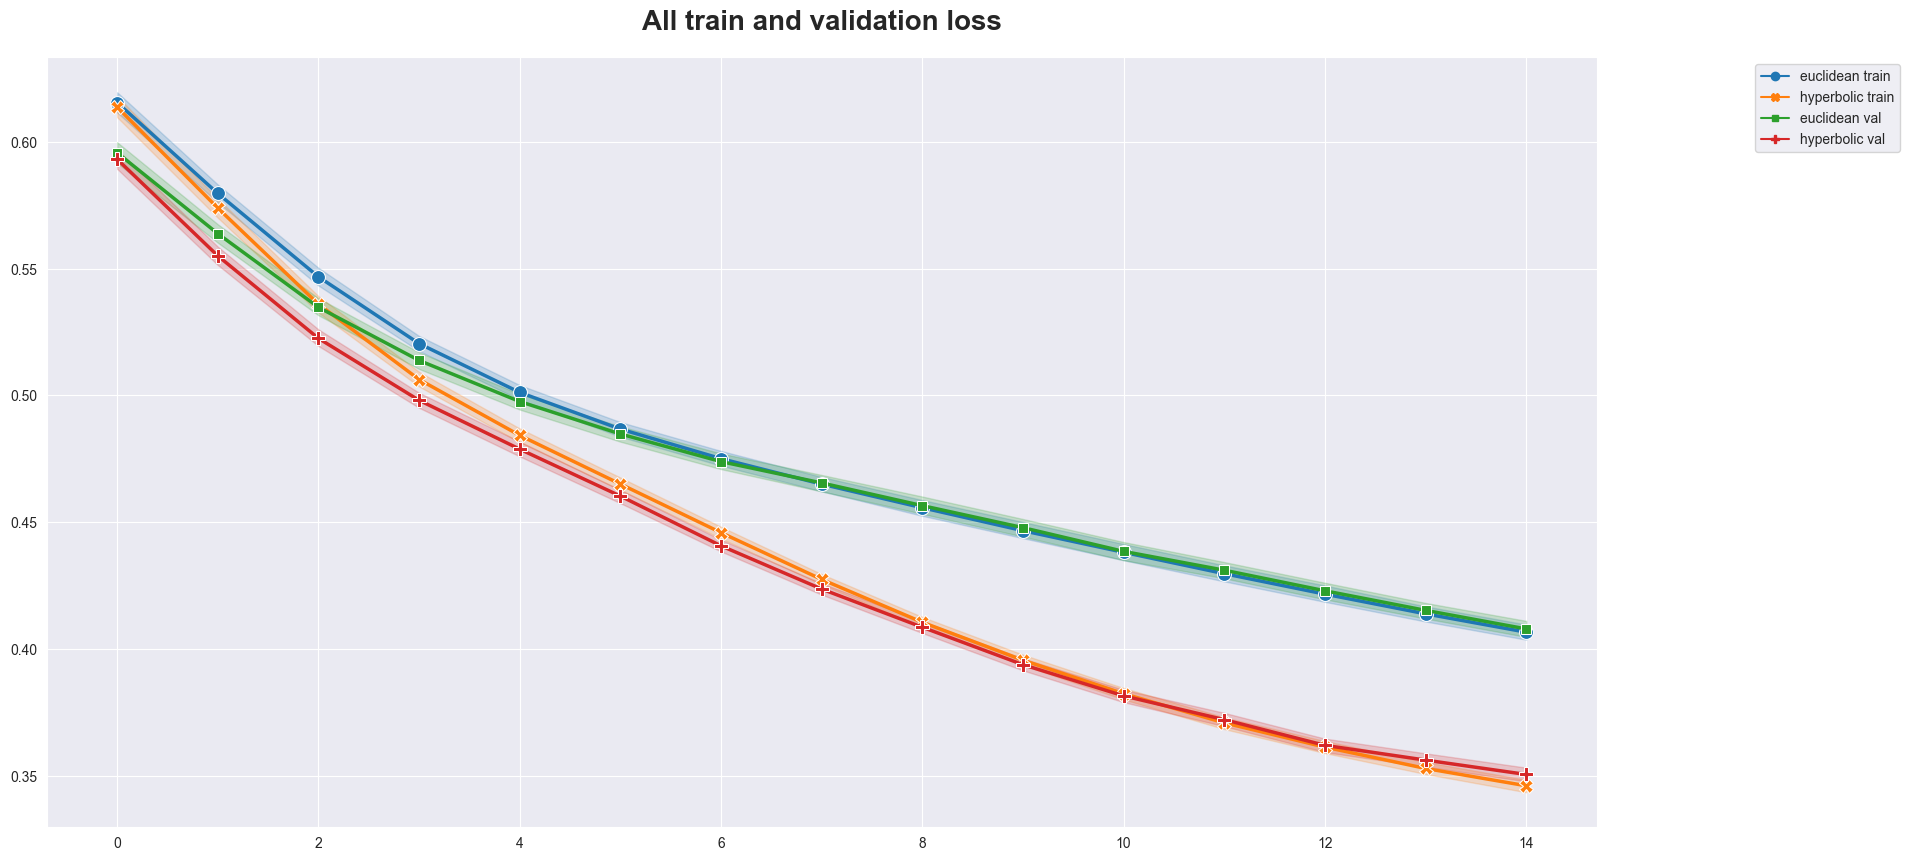

In [9]:
sns.set_style("darkgrid")
data = train_loss(train=train, val=val, alls=True)
plt.figure(figsize=(20, 10))

sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), ncol=1)
plt.title("All train and validation loss", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### Comparation of Z-Prefix with same positives-negatives Examples


2) ***Z-Prefix 10%- 0.5 postives***

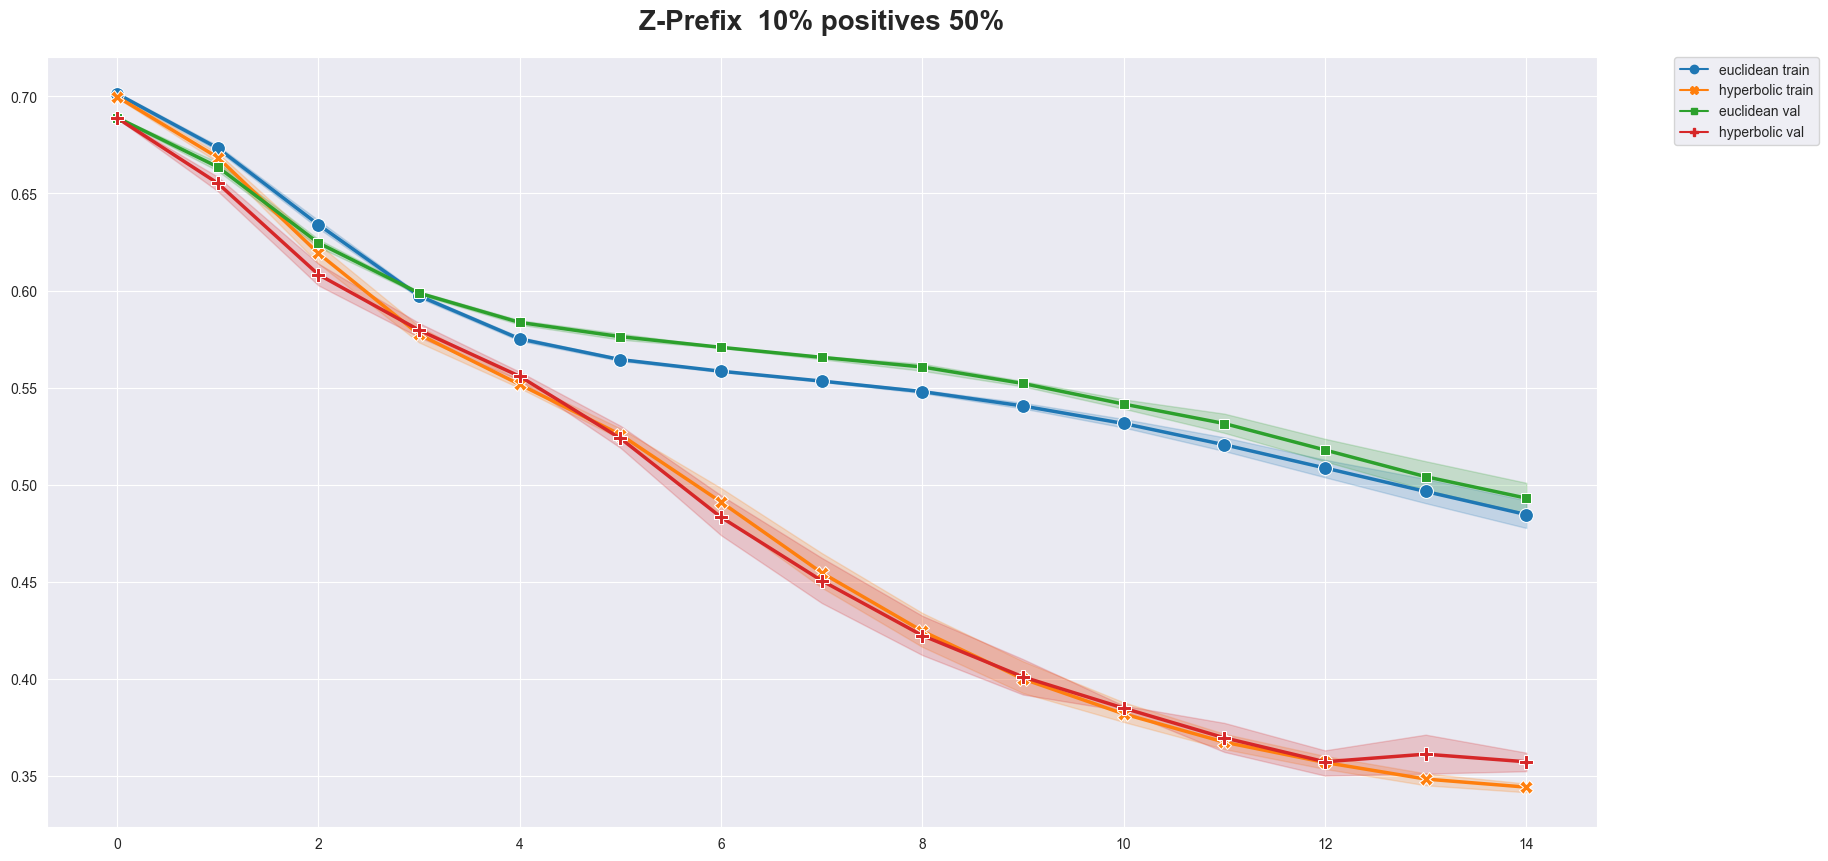

In [10]:
data = train_loss(dataset="10", replace="0.5", postives="0.5", train=train, val=val)
data = pd.concat(
    [
        data,
        train_loss(dataset="10", replace="0.3", postives="0.5", train=train, val=val),
    ],
    axis=1,
)
data = pd.concat(
    [
        data,
        train_loss(dataset="10", replace="0.1", postives="0.5", train=train, val=val),
    ],
    axis=1,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  10% positives 50%", fontsize=20, fontweight="bold", pad=20)
plt.show()

3) ***Z-Prefix 30%- 0.5 postives***

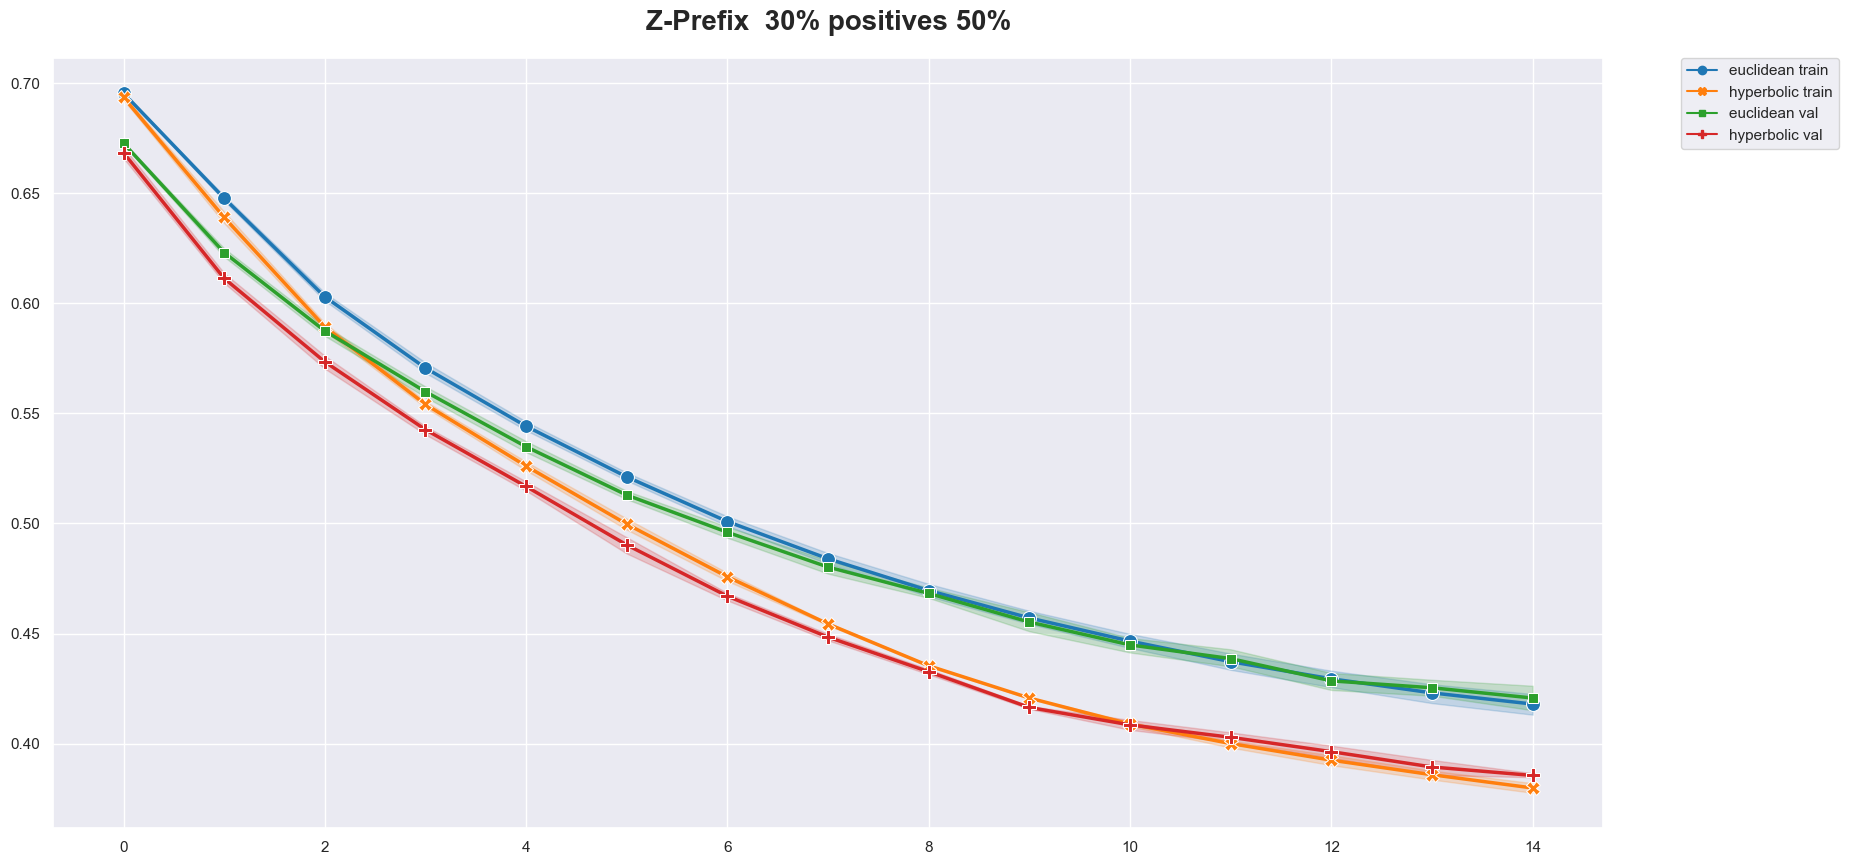

In [354]:
data = train_loss(dataset="30", replace="0.5", postives="0.5", train=train, val=val)
data = pd.concat(
    [
        data,
        train_loss(dataset="30", replace="0.3", postives="0.5", train=train, val=val),
    ],
    axis=1,
)
data = pd.concat(
    [
        data,
        train_loss(dataset="30", replace="0.1", postives="0.5", train=train, val=val),
    ],
    axis=1,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  30% positives 50%", fontsize=20, fontweight="bold", pad=20)
plt.show()

4) ***Dataset 50% - 0.5 positivies***

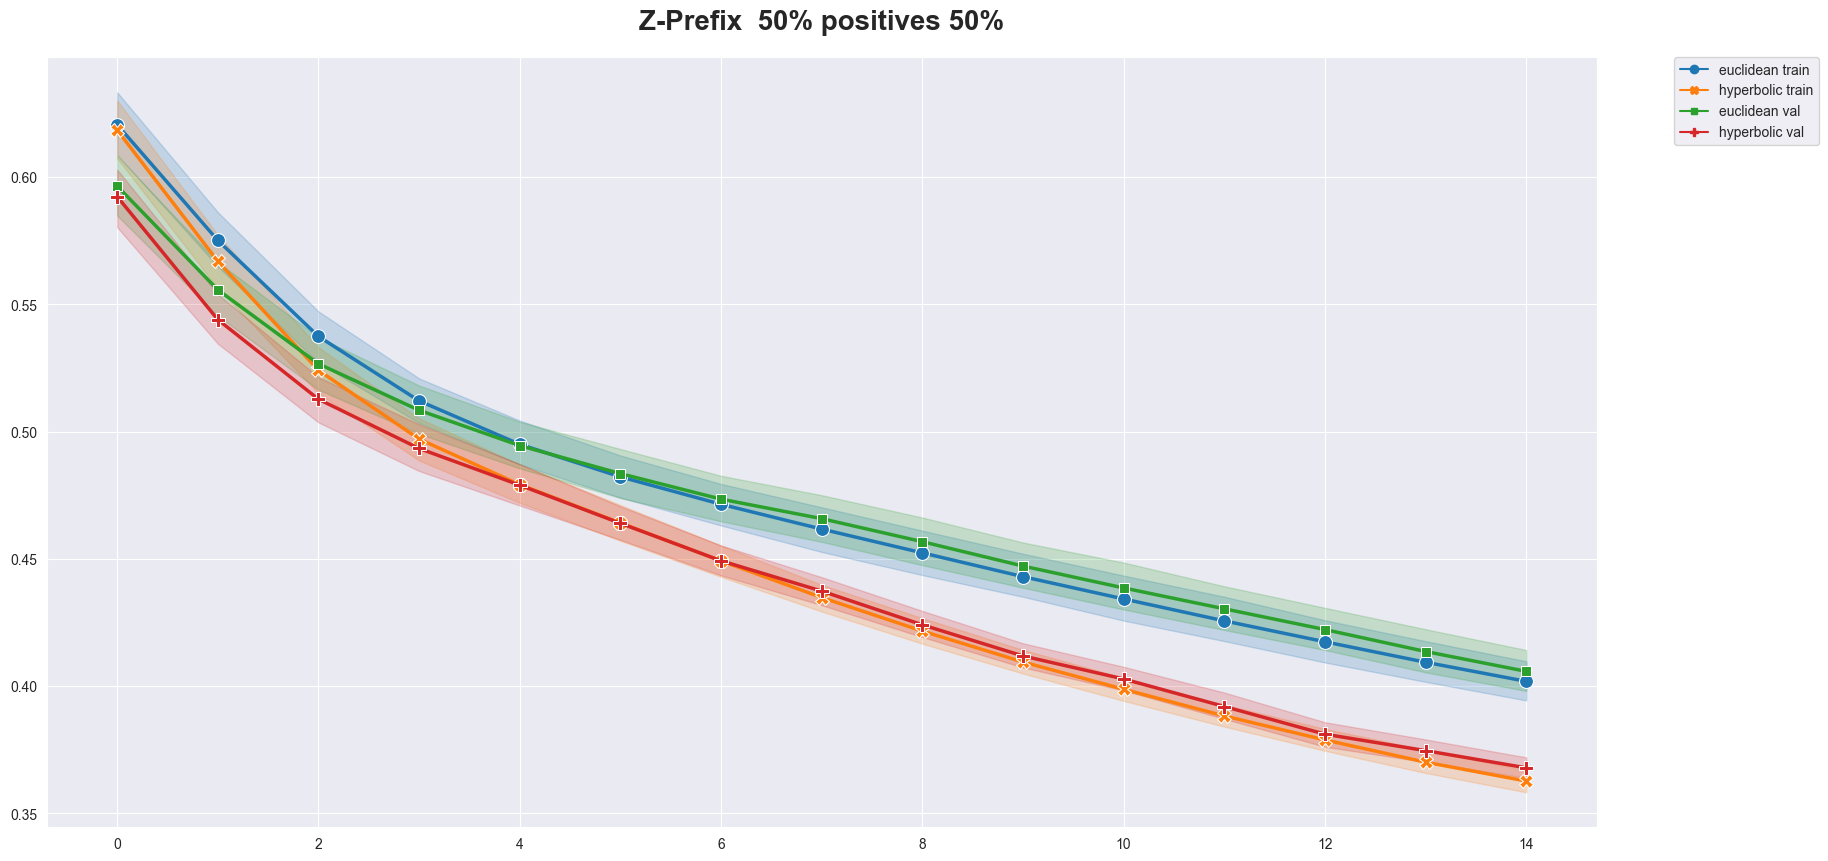

In [11]:
data = train_loss(filtter="50", train=train, val=val)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  50% positives 50%", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### Only Z-Prefix compares

5) ***Z-Prefix 10%***

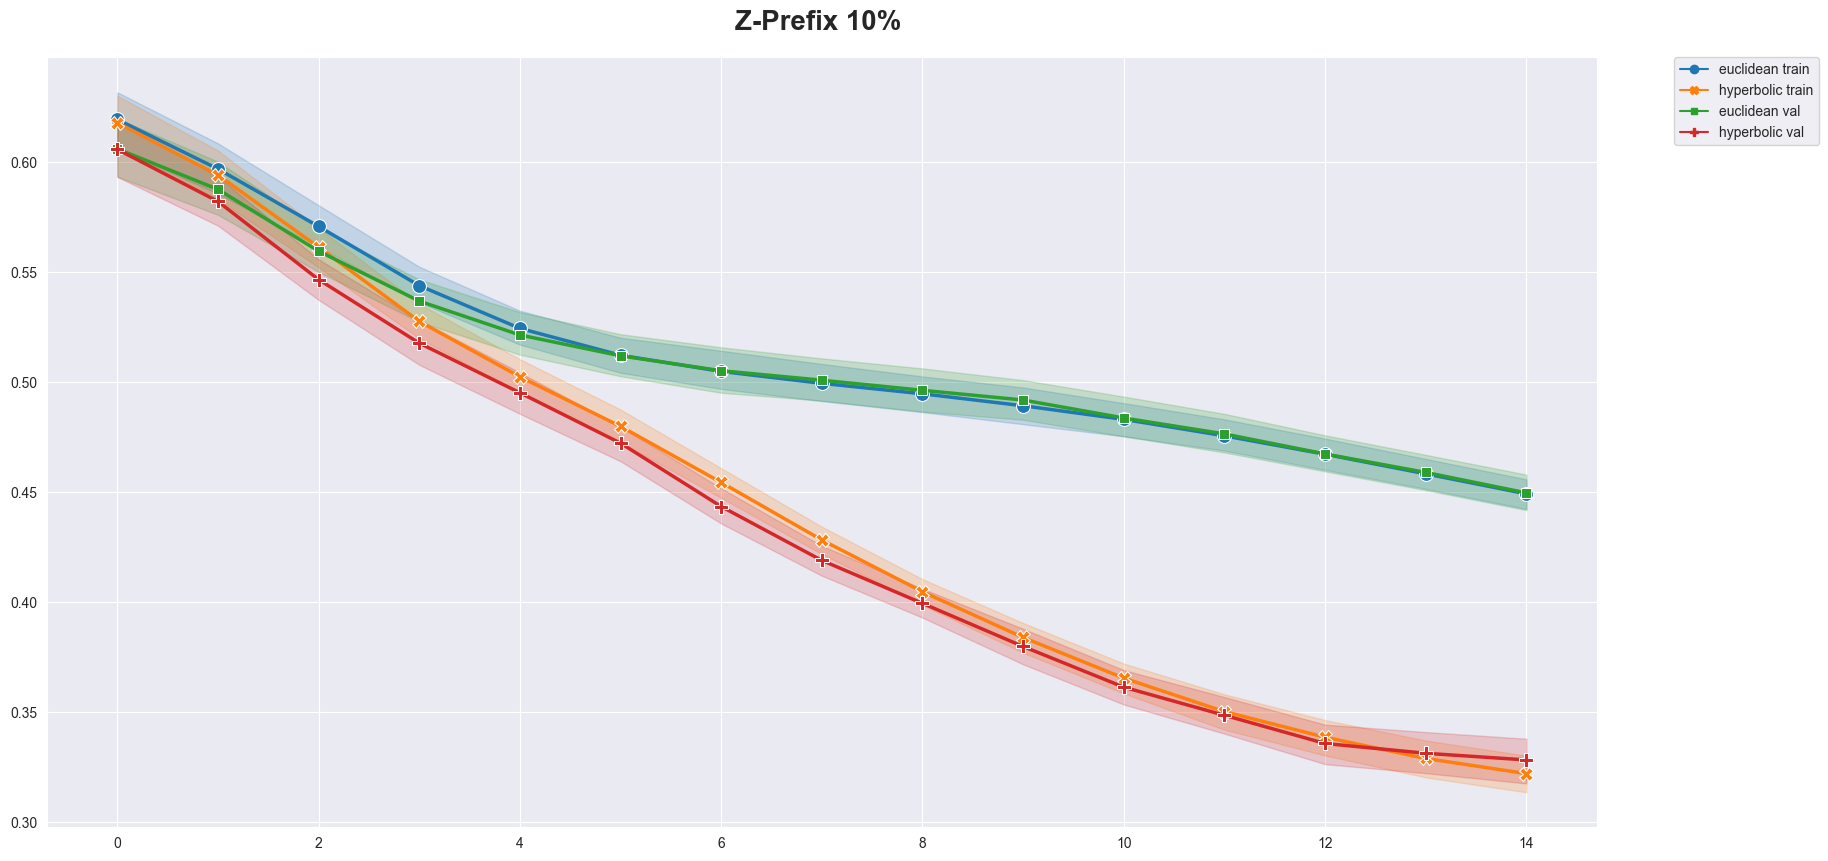

In [12]:
data = train_loss(filtter="10", train=train, val=val)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 10% ", fontsize=20, fontweight="bold", pad=20)
plt.show()

6) 30% Z-Prefix

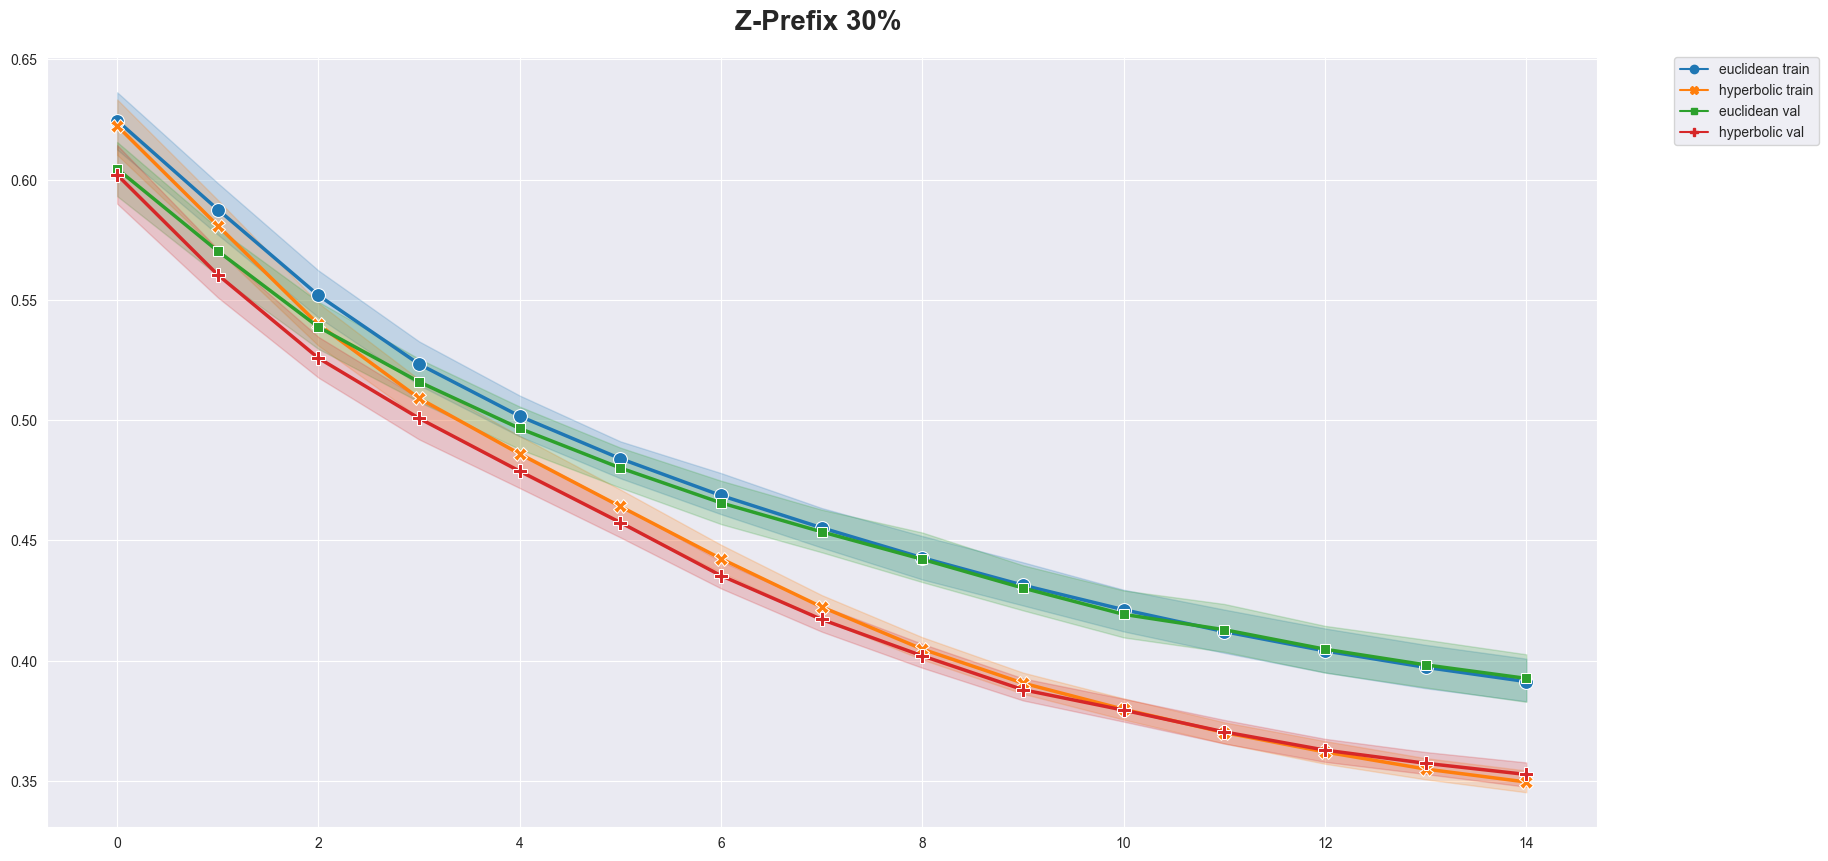

In [13]:
data = train_loss(filtter="30", train=train, val=val)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 30% ", fontsize=20, fontweight="bold", pad=20)
plt.show()

7)  ***50% Z-Prefix***

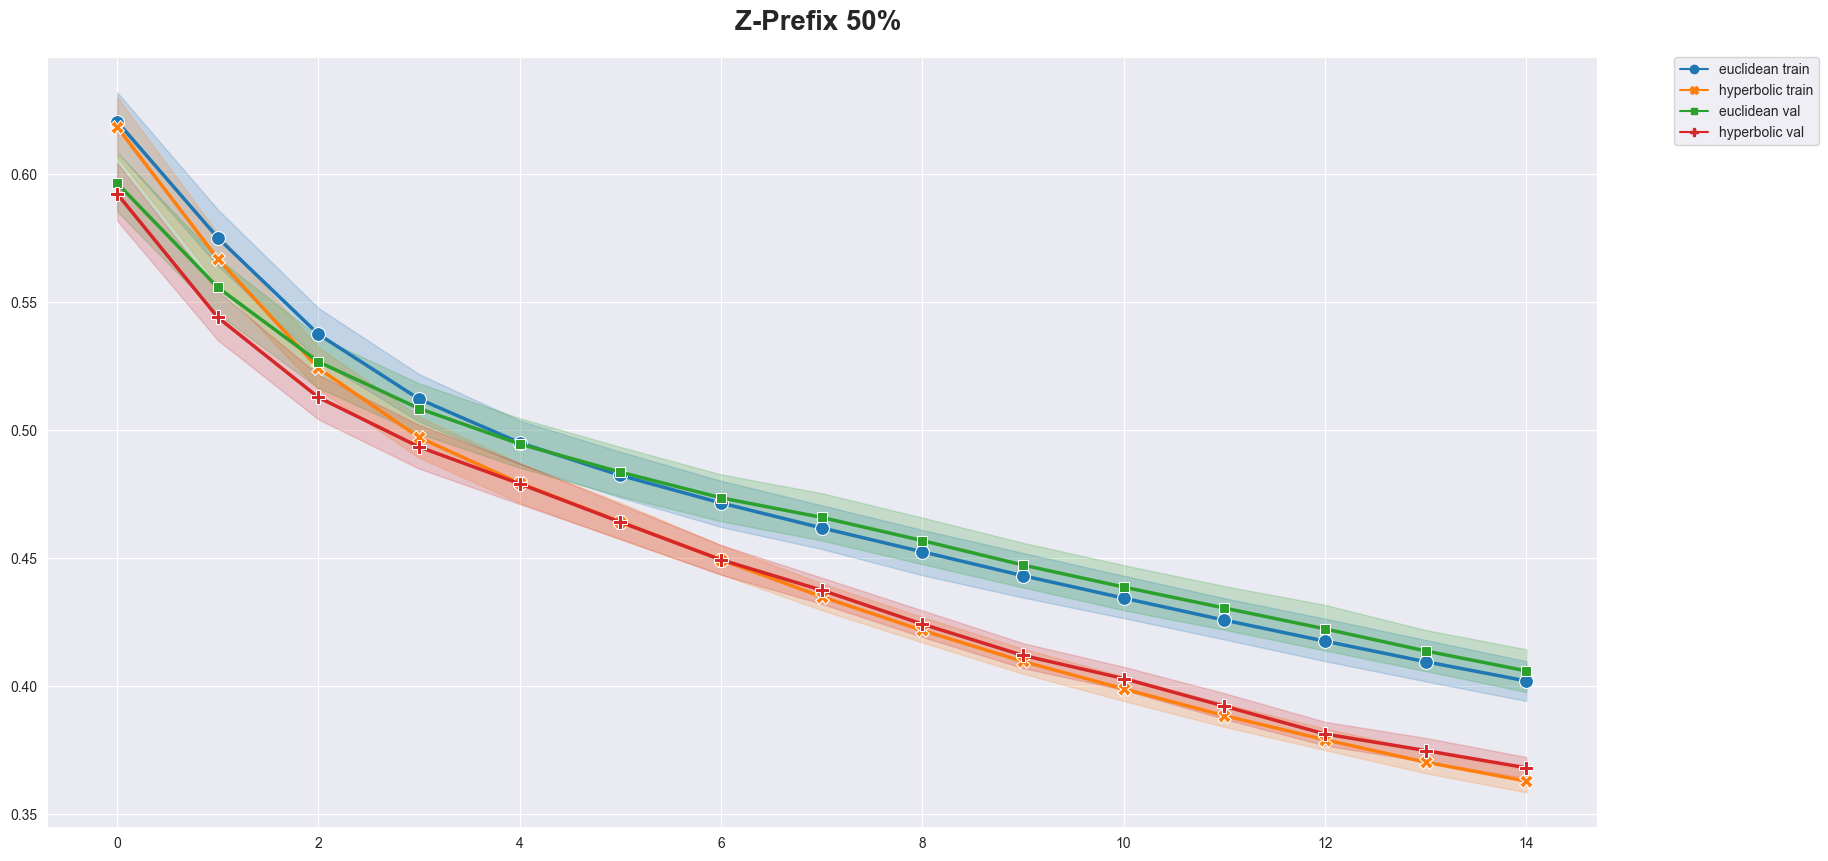

In [14]:
data = train_loss(filtter="50", train=train, val=val)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 50% ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### Comparing Positives extremes

8) ***Positives extremes 25%***

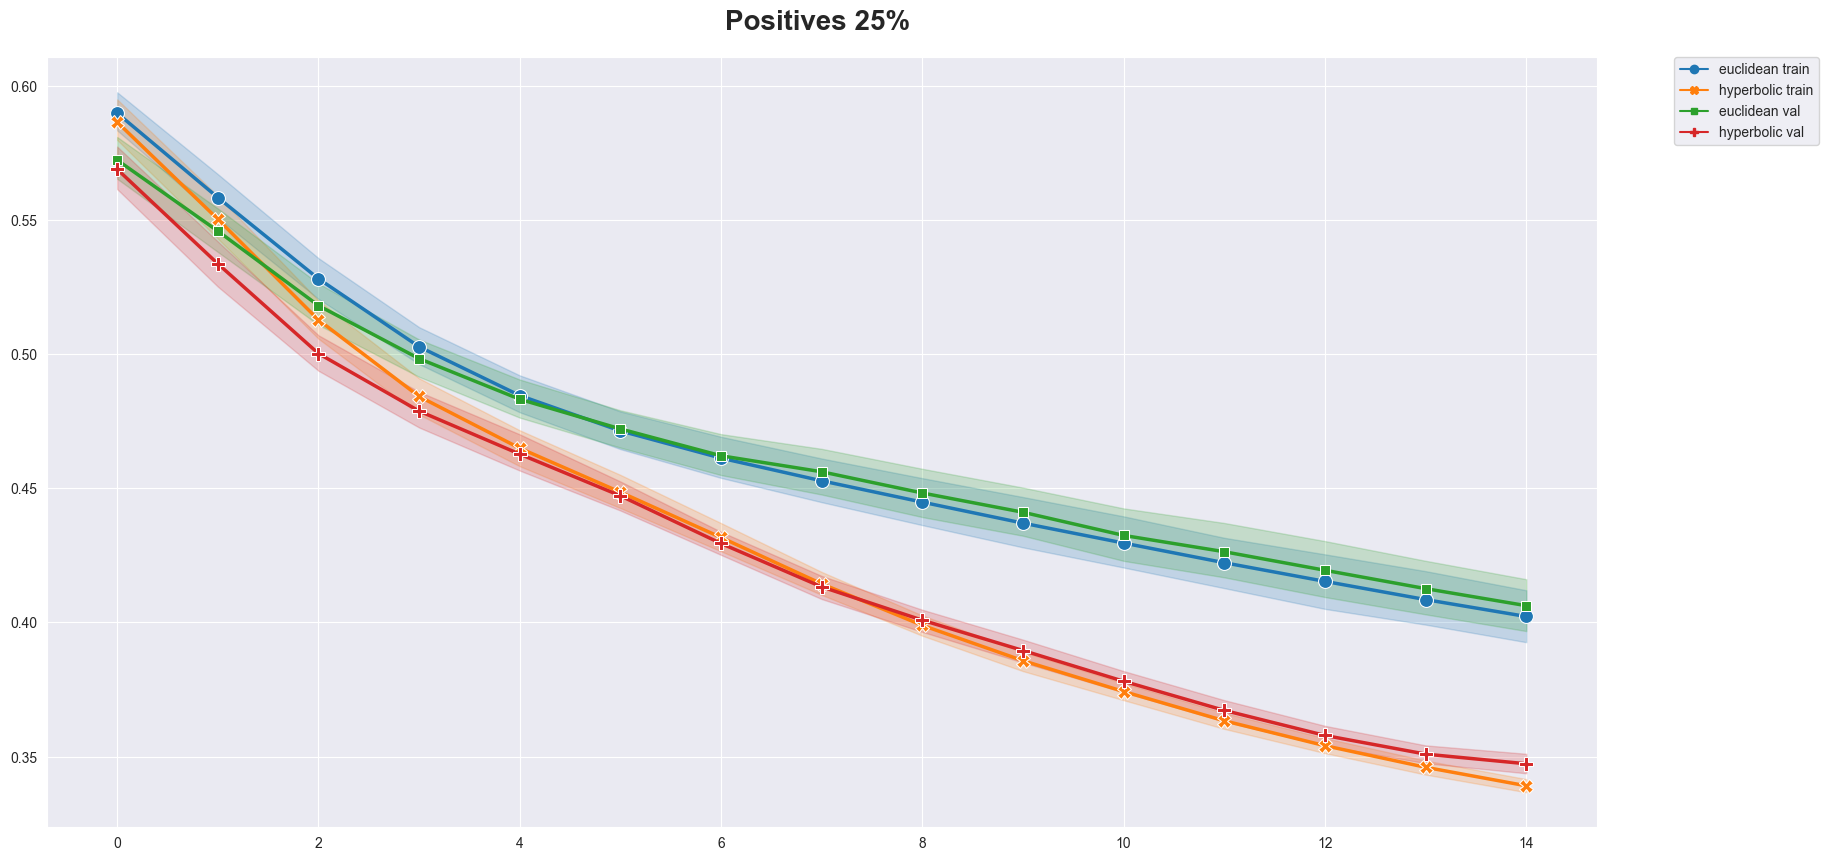

In [15]:
data = train_loss(filtter="0.25", train=train, val=val)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Positives 25% ", fontsize=20, fontweight="bold", pad=20)
plt.show()

9) ***75% positives examples***

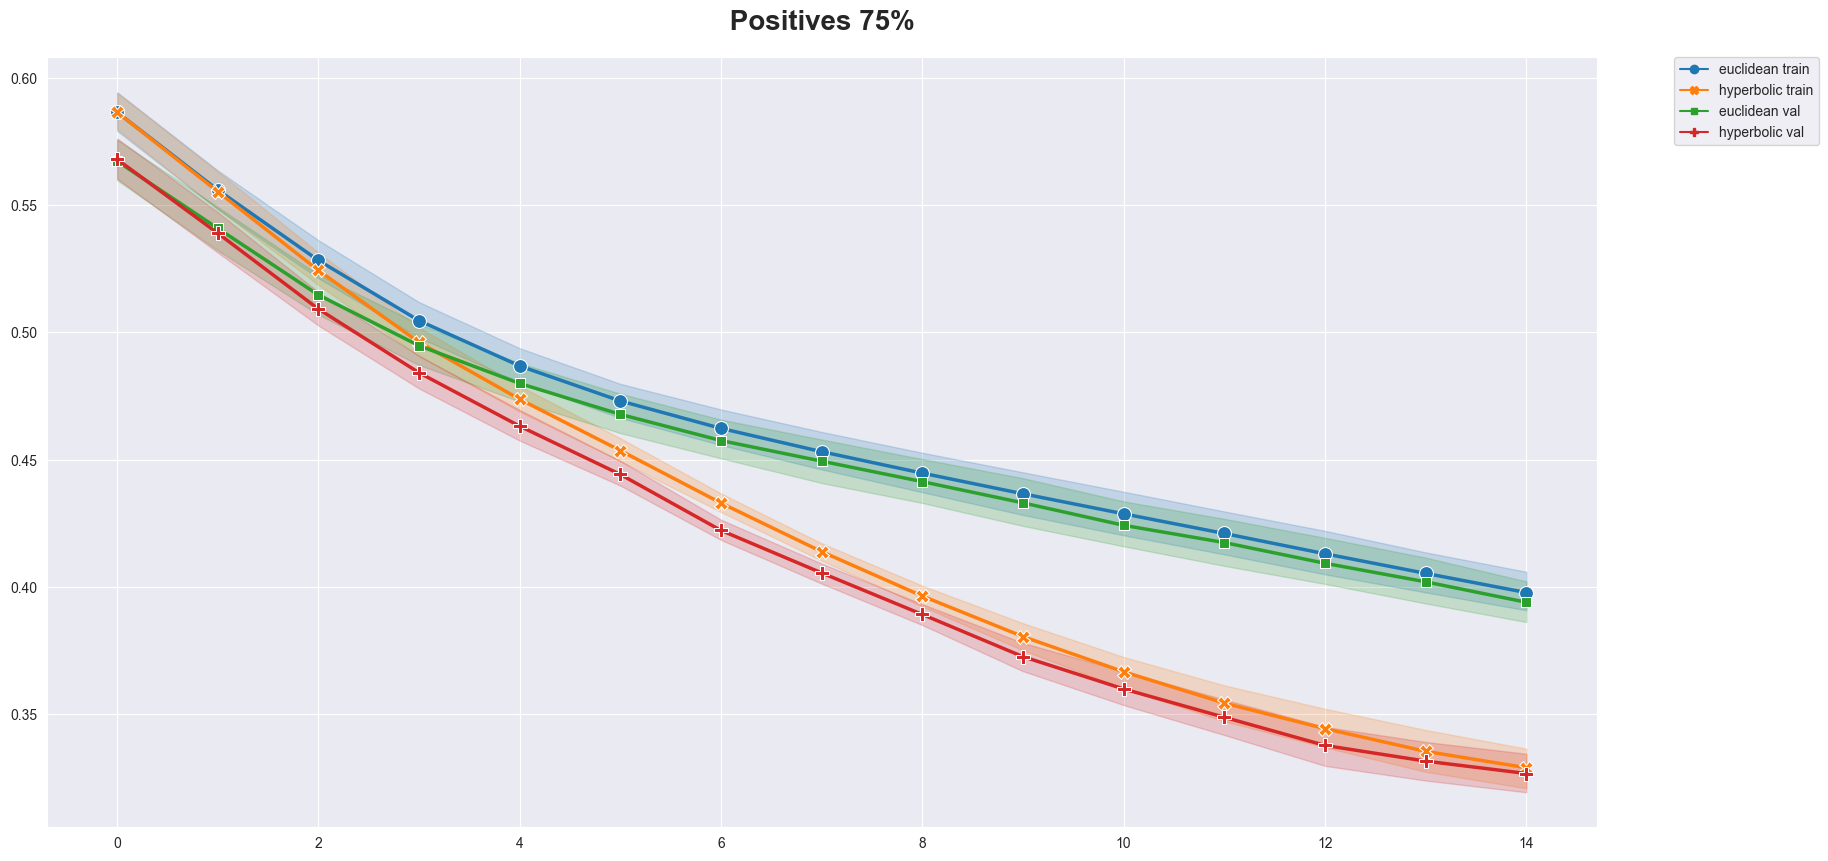

In [16]:
data = train_loss(filtter="0.75", train=train, val=val)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(" Positives 75% ", fontsize=20, fontweight="bold", pad=20)
plt.show()